In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
file_name = 'data/imported_data.csv'
df = pd.read_csv(file_name)

In [3]:
df

,X,Y,Z,R,G,B,Intensity,Original_cloud_index,Illuminance_(PCV),Classification,Nx,Ny,Nz
0,-13.693141,19.327297,-1.010548,62,20,214,4,2,0.898305,4.0,0.182153,-0.971910,-0.149035
1,-13.690192,19.326153,-1.012546,62,20,214,4,2,0.898305,4.0,0.153613,-0.986175,-0.062149
2,-13.688504,19.322510,-1.054509,62,20,214,6,2,0.783898,4.0,-0.131122,-0.903758,0.407466
3,-13.685031,19.329977,-1.010620,62,20,214,3,2,0.902542,4.0,0.154478,-0.987513,-0.030896
4,-13.682658,19.318302,-1.052479,62,20,214,8,2,0.805085,4.0,-0.223175,-0.725710,0.650798
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346928,9.440657,21.270155,-1.146209,31,32,37,6,4,0.639831,NaN,-0.925806,-0.059772,-0.373244
346929,9.455648,22.339735,-1.076674,44,42,45,18,4,0.944915,NaN,-0.177199,-0.112763,0.977694
346930,9.427746,21.730379,-1.089457,40,40,40,22,4,0.915254,NaN,-0.698512,-0.061930,0.712914
346931,9.436288,21.778114,-1.112198,34,32,33,8,4,0.830508,NaN,-0.886486,0.076302,-0.456422


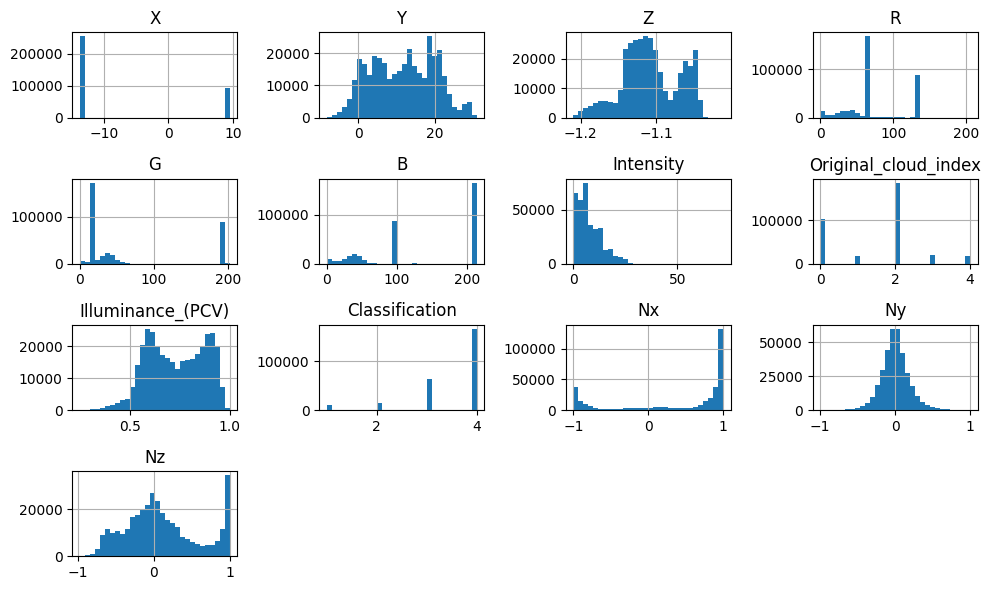

In [4]:
# Histograms for each column
df.hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [5]:
# convert from meters to feet
df[['lateral', 'axial', 'vertical']] = df[['X', 'Y', 'Z']] * 3.28084

In [6]:
df['vertical'] = df['vertical'] - df['vertical'].min() # set min to 0
df['axial'] = df['axial'] - df['axial'].min() # set min to 0

In [7]:
df[['lateral_inch', 'axial_inch', 'vertical_inch']] = df[['lateral', 'axial', 'vertical']] * 12 # convert to inches

In [8]:

df[['lateral_inch_round', 'axial_inch_round', 'vertical_inch_round']] = df[['lateral_inch', 'axial_inch', 'vertical_inch']].apply(
    lambda col: col.map(lambda x: round(x * 16) / 16)
)


In [9]:
drop_cols = ['X', 'Y', 'Z', 'R', 'B', 'G', 'Nx', 'Ny', 'Nz']
df = df.drop(columns=drop_cols)

In [10]:
df.drop(columns=['Illuminance_(PCV)'], inplace=True)

In [11]:
df

,Intensity,Original_cloud_index,Classification,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,axial_inch_round,vertical_inch_round
0,4,2,4.0,-44.925005,90.213491,0.654076,-539.100056,1082.561896,7.848909,-539.1250,1082.5625,7.8750
1,4,2,4.0,-44.915330,90.209737,0.647520,-538.983963,1082.516840,7.770240,-539.0000,1082.5000,7.7500
2,6,2,4.0,-44.909792,90.197784,0.509847,-538.917506,1082.373414,6.118159,-538.9375,1082.3750,6.1250
3,3,2,4.0,-44.898397,90.222283,0.653840,-538.780763,1082.667401,7.846079,-538.7500,1082.6875,7.8750
4,8,2,4.0,-44.890612,90.183980,0.516509,-538.687348,1082.207759,6.198104,-538.6875,1082.1875,6.1875
...,...,...,...,...,...,...,...,...,...,...,...,...
346928,6,4,NaN,30.973284,96.587697,0.208996,371.679408,1159.052360,2.507948,371.6875,1159.0625,2.5000
346929,18,4,NaN,31.022470,100.096818,0.437129,372.269635,1201.161814,5.245547,372.2500,1201.1875,5.2500
346930,22,4,NaN,30.930926,98.097618,0.395188,371.171107,1177.171422,4.742258,371.1875,1177.1875,4.7500
346931,8,4,NaN,30.958951,98.254230,0.320579,371.507409,1179.050761,3.846949,371.5000,1179.0625,3.8750


In [12]:
df.describe()

,Intensity,Original_cloud_index,Classification,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,axial_inch_round,vertical_inch_round
count,346933.000000,346933.000000,255141.000000,346933.000000,346933.000000,346933.000000,346933.000000,346933.000000,346933.000000,346933.000000,346933.000000,346933.000000
mean,7.678693,1.519002,3.513834,-24.708635,64.550385,0.336548,-296.503618,774.604615,4.038573,-296.503675,774.604636,4.038601
std,5.833132,1.130317,0.785351,33.397963,27.058501,0.124188,400.775556,324.702010,1.490252,400.775594,324.702011,1.490366
min,0.000000,0.000000,1.000000,-44.925005,0.000000,0.000000,-539.100056,0.000000,0.000000,-539.125000,0.000000,0.000000
25%,3.000000,0.000000,3.000000,-44.762070,41.161356,0.254556,-537.144836,493.936273,3.054668,-537.125000,493.937500,3.062500
50%,6.000000,2.000000,4.000000,-44.732586,65.854903,0.325233,-536.791038,790.258831,3.902799,-536.812500,790.250000,3.875000
75%,11.000000,2.000000,4.000000,30.918707,87.628083,0.446572,371.024489,1051.536992,5.358861,371.000000,1051.562500,5.375000
max,72.000000,4.000000,4.000000,31.114301,127.864617,0.654076,373.371617,1534.375405,7.848909,373.375000,1534.375000,7.875000


In [13]:
floor_to_rail_top_nom = 25.5 # feet
floor_to_rail_top_nom_inch = floor_to_rail_top_nom * 12 # inches
span_nom = 75.75 # feet
span_nom_inch = span_nom * 12 # inches
rail_height = 5 # inches

In [14]:

def relative_height_rolling(df, axial_col='axial', vertical_col='vertical', window=0.5):
    """
    For each row, find the minimum vertical_inch within ±window along axial_inch.
    Adds:
      - 'min_in_window'
      - 'relative_vertical_inch' = vertical_inch - min_in_window
    """
    d = df[[axial_col, vertical_col]].copy().sort_values(axial_col).reset_index()
    
    # Use rolling with a custom window based on axial distance
    # Convert to pandas Series for convenience
    ax = d[axial_col]
    vert = d[vertical_col]
    
    # We'll compute min in a sliding window using searchsorted for speed
    min_vals = []
    for i, x in enumerate(ax):
        left = ax.searchsorted(x - window)
        right = ax.searchsorted(x + window, side='right')
        min_vals.append(vert.iloc[left:right].min())
    
    d['min_in_window'] = min_vals
    d['relative_vertical_inch'] = d[vertical_col] - d['min_in_window']
    
    # Merge back to original order
    df = df.copy()
    df['min_in_window'] = d.set_index('index')['min_in_window']
    df['relative_vertical_inch'] = d.set_index('index')['relative_vertical_inch']
    
    return df


df = relative_height_rolling(df, axial_col='axial_inch_round', vertical_col='vertical_inch_round', window=0.5)

In [15]:
df

,Intensity,Original_cloud_index,Classification,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,axial_inch_round,vertical_inch_round,min_in_window,relative_vertical_inch
0,4,2,4.0,-44.925005,90.213491,0.654076,-539.100056,1082.561896,7.848909,-539.1250,1082.5625,7.8750,0.5625,7.3125
1,4,2,4.0,-44.915330,90.209737,0.647520,-538.983963,1082.516840,7.770240,-539.0000,1082.5000,7.7500,0.5625,7.1875
2,6,2,4.0,-44.909792,90.197784,0.509847,-538.917506,1082.373414,6.118159,-538.9375,1082.3750,6.1250,0.5000,5.6250
3,3,2,4.0,-44.898397,90.222283,0.653840,-538.780763,1082.667401,7.846079,-538.7500,1082.6875,7.8750,0.4375,7.4375
4,8,2,4.0,-44.890612,90.183980,0.516509,-538.687348,1082.207759,6.198104,-538.6875,1082.1875,6.1875,0.5000,5.6875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346928,6,4,NaN,30.973284,96.587697,0.208996,371.679408,1159.052360,2.507948,371.6875,1159.0625,2.5000,0.7500,1.7500
346929,18,4,NaN,31.022470,100.096818,0.437129,372.269635,1201.161814,5.245547,372.2500,1201.1875,5.2500,1.1250,4.1250
346930,22,4,NaN,30.930926,98.097618,0.395188,371.171107,1177.171422,4.742258,371.1875,1177.1875,4.7500,0.8750,3.8750
346931,8,4,NaN,30.958951,98.254230,0.320579,371.507409,1179.050761,3.846949,371.5000,1179.0625,3.8750,0.8750,3.0000


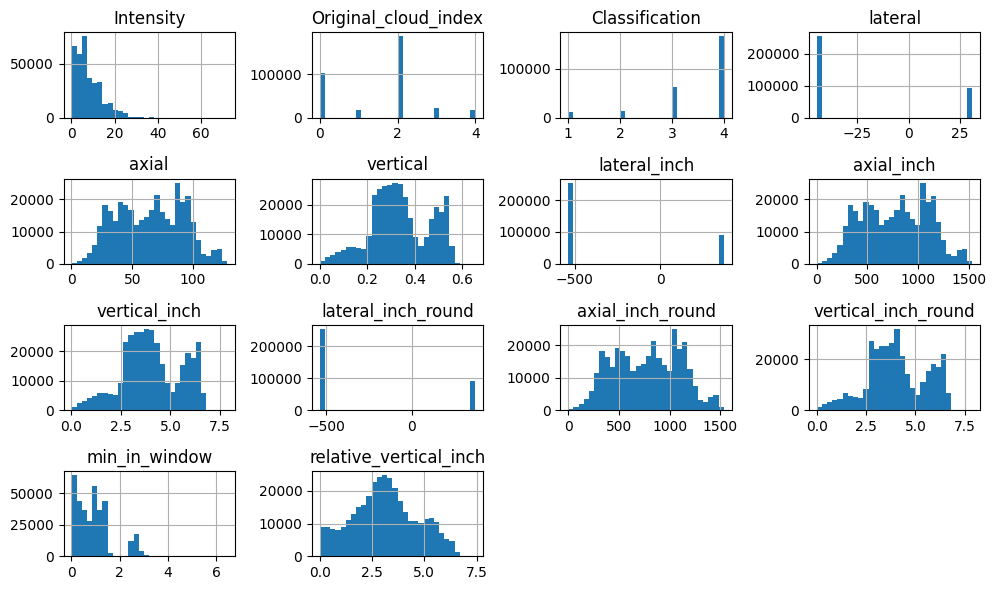

In [16]:
# Histograms for each column
df.hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [17]:
dfa_temp =df[df['lateral'] < df['lateral'].mean()].copy()
dfb_temp =df[df['lateral'] > df['lateral'].mean()].copy()

In [18]:
dfa_temp2 =dfa_temp[dfa_temp['Classification'].isin([1,2,3])].copy()

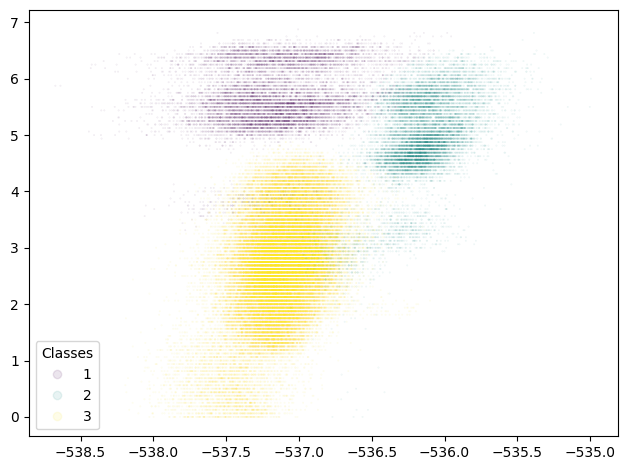

In [19]:
scatter = plt.scatter(dfa_temp2['lateral_inch'], dfa_temp2['relative_vertical_inch'], s=0.1, alpha=0.1, c=dfa_temp2['Classification'])
plt.legend(*scatter.legend_elements(), title="Classes")
plt.tight_layout()
plt.show()

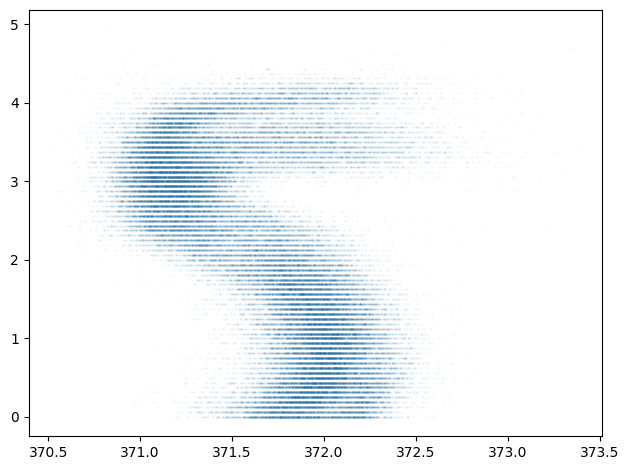

In [20]:
plt.scatter(dfb_temp['lateral_inch'], dfb_temp['relative_vertical_inch'],s =0.1, alpha=0.1)
plt.tight_layout()
plt.show()

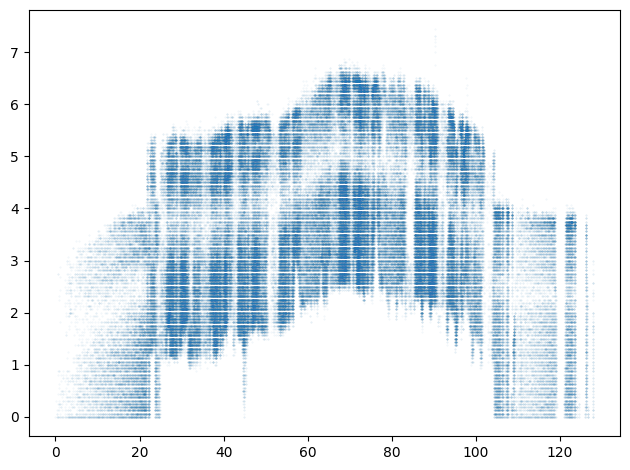

In [21]:
plt.scatter(dfa_temp['axial'], dfa_temp['relative_vertical_inch'],s =0.1, alpha=0.1)
plt.tight_layout()
plt.show()

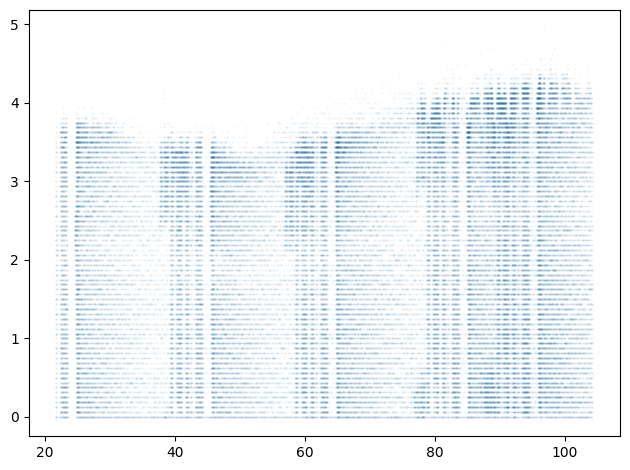

In [22]:
plt.scatter(dfb_temp['axial'], dfb_temp['relative_vertical_inch'],s =0.1, alpha=0.1)
plt.tight_layout()
plt.show()

In [23]:
df

,Intensity,Original_cloud_index,Classification,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,axial_inch_round,vertical_inch_round,min_in_window,relative_vertical_inch
0,4,2,4.0,-44.925005,90.213491,0.654076,-539.100056,1082.561896,7.848909,-539.1250,1082.5625,7.8750,0.5625,7.3125
1,4,2,4.0,-44.915330,90.209737,0.647520,-538.983963,1082.516840,7.770240,-539.0000,1082.5000,7.7500,0.5625,7.1875
2,6,2,4.0,-44.909792,90.197784,0.509847,-538.917506,1082.373414,6.118159,-538.9375,1082.3750,6.1250,0.5000,5.6250
3,3,2,4.0,-44.898397,90.222283,0.653840,-538.780763,1082.667401,7.846079,-538.7500,1082.6875,7.8750,0.4375,7.4375
4,8,2,4.0,-44.890612,90.183980,0.516509,-538.687348,1082.207759,6.198104,-538.6875,1082.1875,6.1875,0.5000,5.6875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346928,6,4,NaN,30.973284,96.587697,0.208996,371.679408,1159.052360,2.507948,371.6875,1159.0625,2.5000,0.7500,1.7500
346929,18,4,NaN,31.022470,100.096818,0.437129,372.269635,1201.161814,5.245547,372.2500,1201.1875,5.2500,1.1250,4.1250
346930,22,4,NaN,30.930926,98.097618,0.395188,371.171107,1177.171422,4.742258,371.1875,1177.1875,4.7500,0.8750,3.8750
346931,8,4,NaN,30.958951,98.254230,0.320579,371.507409,1179.050761,3.846949,371.5000,1179.0625,3.8750,0.8750,3.0000


In [24]:
df.describe()

,Intensity,Original_cloud_index,Classification,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,axial_inch_round,vertical_inch_round,min_in_window,relative_vertical_inch
count,346933.000000,346933.000000,255141.000000,346933.000000,346933.000000,346933.000000,346933.000000,346933.000000,346933.000000,346933.000000,346933.000000,346933.000000,346933.000000,346933.000000
mean,7.678693,1.519002,3.513834,-24.708635,64.550385,0.336548,-296.503618,774.604615,4.038573,-296.503675,774.604636,4.038601,0.920700,3.117901
std,5.833132,1.130317,0.785351,33.397963,27.058501,0.124188,400.775556,324.702010,1.490252,400.775594,324.702011,1.490366,0.759894,1.555047
min,0.000000,0.000000,1.000000,-44.925005,0.000000,0.000000,-539.100056,0.000000,0.000000,-539.125000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,3.000000,-44.762070,41.161356,0.254556,-537.144836,493.936273,3.054668,-537.125000,493.937500,3.062500,0.312500,2.062500
50%,6.000000,2.000000,4.000000,-44.732586,65.854903,0.325233,-536.791038,790.258831,3.902799,-536.812500,790.250000,3.875000,0.875000,3.062500
75%,11.000000,2.000000,4.000000,30.918707,87.628083,0.446572,371.024489,1051.536992,5.358861,371.000000,1051.562500,5.375000,1.250000,4.187500
max,72.000000,4.000000,4.000000,31.114301,127.864617,0.654076,373.371617,1534.375405,7.848909,373.375000,1534.375000,7.875000,6.437500,7.437500


In [25]:
df.to_csv('data/df_processed.csv', index=False)